In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("Hotels Booking Data (1).csv")

In [4]:
df.head()

,customer_id,property_id,city,star_rating,booking_date,check_in_date,check_out_date,room_type,num_rooms_booked,stay_type,...,refund_status,refund_amount,channel_of_booking,booking_status,travel_date,cashback,coupon_redeem,Coupon USed?,length_of_stay,is_weekend_checkin
0,492,3,San Francisco,4,2024-04-01,2024-05-24,2024-05-26,Standard,1,Leisure,...,Yes,369.65,Web,Confirmed,2024-03-04,5.37,0.0,No,2.0,True
1,180,3,Dallas,3,2024-04-01,2024-05-10,2024-05-17,Deluxe,1,Leisure,...,Yes,492.51,Web,Confirmed,2024-07-19,7.16,0.0,No,7.0,True
2,50,5,Dallas,3,2024-04-01,2024-05-31,2024-06-05,Deluxe,1,Business,...,Yes,0.00,iOS,Confirmed,2024-03-22,0.00,0.0,No,5.0,True
3,294,3,Orlando,4,2024-04-01,2024-04-18,2024-04-24,Deluxe,3,Leisure,...,Yes,545.54,Android,Confirmed,2024-11-24,7.93,24.5,Yes,6.0,False
4,40,5,Seattle,5,2024-04-01,NaN,NaN,Deluxe,1,Leisure,...,Yes,211.37,Web,Cancelled,2024-03-02,0.00,0.0,No,NaN,False


In [5]:
df.tail()

,customer_id,property_id,city,star_rating,booking_date,check_in_date,check_out_date,room_type,num_rooms_booked,stay_type,...,refund_status,refund_amount,channel_of_booking,booking_status,travel_date,cashback,coupon_redeem,Coupon USed?,length_of_stay,is_weekend_checkin
29995,91,5,Boston,4,2025-04-29,2025-05-23,2025-05-24,Standard,1,Business,...,Yes,286.66,Web,Confirmed,2024-10-05,0.00,0.00,No,1.0,True
29996,432,5,Los Angeles,4,2025-04-29,2025-06-24,2025-06-25,Deluxe,1,Leisure,...,Yes,918.26,iOS,Confirmed,2024-10-22,0.00,0.00,No,1.0,False
29997,15,5,Boston,5,2025-04-29,2025-06-17,2025-06-20,Standard,1,Leisure,...,Yes,417.02,iOS,Confirmed,2024-10-22,0.00,2.58,Yes,3.0,False
29998,73,1,San Francisco,3,2025-04-29,NaN,NaN,Standard,1,Business,...,Yes,468.35,Android,Cancelled,2024-10-15,6.81,0.00,No,NaN,False
29999,151,1,Los Angeles,3,2025-04-30,2025-05-15,2025-05-21,Standard,1,Leisure,...,Yes,784.54,Android,Confirmed,2024-10-12,11.41,0.00,No,6.0,False


In [6]:
df.shape

(30000, 26)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         30000 non-null  int64  
 1   property_id         30000 non-null  int64  
 2   city                30000 non-null  object 
 3   star_rating         30000 non-null  int64  
 4   booking_date        30000 non-null  object 
 5   check_in_date       24532 non-null  object 
 6   check_out_date      24532 non-null  object 
 7   room_type           30000 non-null  object 
 8   num_rooms_booked    30000 non-null  int64  
 9   stay_type           30000 non-null  object 
 10  booking_channel     30000 non-null  object 
 11  booking_value       30000 non-null  float64
 12  costprice           30000 non-null  int64  
 13  markup              30000 non-null  float64
 14  selling_price       30000 non-null  float64
 15  payment_method      30000 non-null  object 
 16  refu

In [8]:
df.isnull().sum()

customer_id              0
property_id              0
city                     0
star_rating              0
booking_date             0
check_in_date         5468
check_out_date        5468
room_type                0
num_rooms_booked         0
stay_type                0
booking_channel          0
booking_value            0
costprice                0
markup                   0
selling_price            0
payment_method           0
refund_status            0
refund_amount            0
channel_of_booking       0
booking_status           0
travel_date              0
cashback                 0
coupon_redeem            0
Coupon USed?             0
length_of_stay        5468
is_weekend_checkin       0
dtype: int64

In [9]:
confirmed_df = df[df['booking_status'].str.lower() == 'confirmed']


In [10]:
df['missing_stay_flag'] = np.where(df['length_of_stay'].isnull(), 1, 0)


In [11]:
df['length_of_stay'] = df['length_of_stay'].fillna(0)


In [12]:
df.head()

,customer_id,property_id,city,star_rating,booking_date,check_in_date,check_out_date,room_type,num_rooms_booked,stay_type,...,refund_amount,channel_of_booking,booking_status,travel_date,cashback,coupon_redeem,Coupon USed?,length_of_stay,is_weekend_checkin,missing_stay_flag
0,492,3,San Francisco,4,2024-04-01,2024-05-24,2024-05-26,Standard,1,Leisure,...,369.65,Web,Confirmed,2024-03-04,5.37,0.0,No,2.0,True,0
1,180,3,Dallas,3,2024-04-01,2024-05-10,2024-05-17,Deluxe,1,Leisure,...,492.51,Web,Confirmed,2024-07-19,7.16,0.0,No,7.0,True,0
2,50,5,Dallas,3,2024-04-01,2024-05-31,2024-06-05,Deluxe,1,Business,...,0.00,iOS,Confirmed,2024-03-22,0.00,0.0,No,5.0,True,0
3,294,3,Orlando,4,2024-04-01,2024-04-18,2024-04-24,Deluxe,3,Leisure,...,545.54,Android,Confirmed,2024-11-24,7.93,24.5,Yes,6.0,False,0
4,40,5,Seattle,5,2024-04-01,NaN,NaN,Deluxe,1,Leisure,...,211.37,Web,Cancelled,2024-03-02,0.00,0.0,No,0.0,False,1


In [13]:
df.tail(10)

,customer_id,property_id,city,star_rating,booking_date,check_in_date,check_out_date,room_type,num_rooms_booked,stay_type,...,refund_amount,channel_of_booking,booking_status,travel_date,cashback,coupon_redeem,Coupon USed?,length_of_stay,is_weekend_checkin,missing_stay_flag
29990,475,3,New York,4,2025-04-29,2025-05-19,2025-05-23,Standard,2,Leisure,...,856.75,Android,Confirmed,2024-10-11,12.46,0.00,No,4.0,False,0
29991,34,1,Orlando,4,2025-04-29,2025-05-20,2025-05-27,Standard,2,Leisure,...,523.23,Android,Confirmed,2024-10-02,7.61,0.00,No,7.0,False,0
29992,93,5,Las Vegas,5,2025-04-29,2025-06-13,2025-06-14,Suite,1,Business,...,887.01,Web,Cancelled,2024-10-03,0.00,0.00,No,1.0,True,0
29993,195,5,New York,4,2025-04-29,NaN,NaN,Standard,1,Leisure,...,1154.30,Android,Cancelled,2024-10-25,0.00,0.00,No,0.0,False,1
29994,314,5,Boston,5,2025-04-29,2025-05-09,2025-05-13,Standard,1,Business,...,0.00,Web,Confirmed,2024-10-17,0.00,0.00,No,4.0,True,0
29995,91,5,Boston,4,2025-04-29,2025-05-23,2025-05-24,Standard,1,Business,...,286.66,Web,Confirmed,2024-10-05,0.00,0.00,No,1.0,True,0
29996,432,5,Los Angeles,4,2025-04-29,2025-06-24,2025-06-25,Deluxe,1,Leisure,...,918.26,iOS,Confirmed,2024-10-22,0.00,0.00,No,1.0,False,0
29997,15,5,Boston,5,2025-04-29,2025-06-17,2025-06-20,Standard,1,Leisure,...,417.02,iOS,Confirmed,2024-10-22,0.00,2.58,Yes,3.0,False,0
29998,73,1,San Francisco,3,2025-04-29,NaN,NaN,Standard,1,Business,...,468.35,Android,Cancelled,2024-10-15,6.81,0.00,No,0.0,False,1
29999,151,1,Los Angeles,3,2025-04-30,2025-05-15,2025-05-21,Standard,1,Leisure,...,784.54,Android,Confirmed,2024-10-12,11.41,0.00,No,6.0,False,0


In [14]:
confirmed_df = df[df['booking_status'].str.lower() == 'confirmed']


In [15]:
df['is_cancelled'] = df['booking_status'].str.lower().apply(
    lambda x: 1 if 'cancel' in x else 0
)


In [16]:
df.head()

,customer_id,property_id,city,star_rating,booking_date,check_in_date,check_out_date,room_type,num_rooms_booked,stay_type,...,channel_of_booking,booking_status,travel_date,cashback,coupon_redeem,Coupon USed?,length_of_stay,is_weekend_checkin,missing_stay_flag,is_cancelled
0,492,3,San Francisco,4,2024-04-01,2024-05-24,2024-05-26,Standard,1,Leisure,...,Web,Confirmed,2024-03-04,5.37,0.0,No,2.0,True,0,0
1,180,3,Dallas,3,2024-04-01,2024-05-10,2024-05-17,Deluxe,1,Leisure,...,Web,Confirmed,2024-07-19,7.16,0.0,No,7.0,True,0,0
2,50,5,Dallas,3,2024-04-01,2024-05-31,2024-06-05,Deluxe,1,Business,...,iOS,Confirmed,2024-03-22,0.00,0.0,No,5.0,True,0,0
3,294,3,Orlando,4,2024-04-01,2024-04-18,2024-04-24,Deluxe,3,Leisure,...,Android,Confirmed,2024-11-24,7.93,24.5,Yes,6.0,False,0,0
4,40,5,Seattle,5,2024-04-01,NaN,NaN,Deluxe,1,Leisure,...,Web,Cancelled,2024-03-02,0.00,0.0,No,0.0,False,1,1


In [17]:
channel_cancel = df.groupby('booking_channel').agg(
    total_bookings=('booking_channel', 'count'),
    cancelled_bookings=('is_cancelled', 'sum'),
    cancellation_rate=('is_cancelled', 'mean'),
    avg_booking_value=('booking_value', 'mean')
).reset_index()

channel_cancel


,booking_channel,total_bookings,cancelled_bookings,cancellation_rate,avg_booking_value
0,Mobile App,12009,2693,0.224248,21351.285716
1,Travel Agent,2990,786,0.262876,24453.972990
2,Web,15001,2300,0.153323,28190.840225


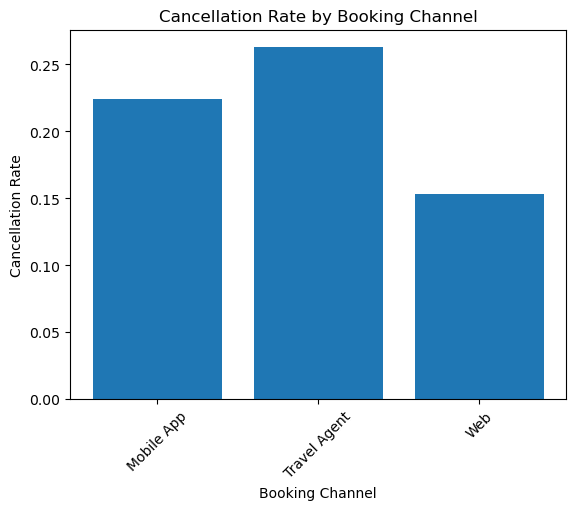

In [18]:
plt.figure()
plt.bar(channel_cancel['booking_channel'], channel_cancel['cancellation_rate'])
plt.title('Cancellation Rate by Booking Channel')
plt.xlabel('Booking Channel')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.show()


In [19]:
channel_type_cancel = df.groupby('channel_of_booking').agg(
    total_bookings=('channel_of_booking', 'count'),
    cancellation_rate=('is_cancelled', 'mean'),
    avg_markup=('markup', 'mean')
).reset_index()

channel_type_cancel


,channel_of_booking,total_bookings,cancellation_rate,avg_markup
0,Android,9505,0.194108,7230.645905
1,Web,16023,0.189166,7193.321704
2,iOS,4472,0.201923,7157.115250


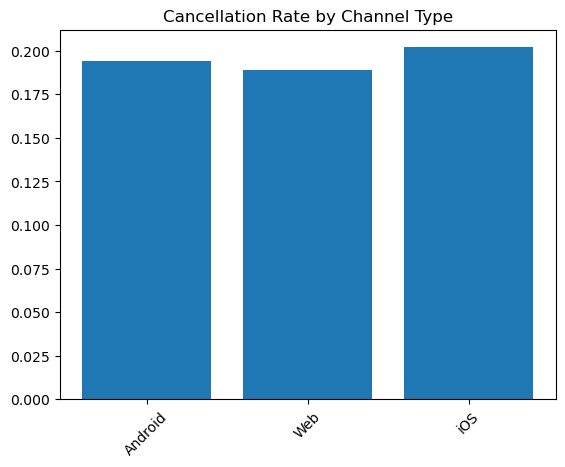

In [20]:
plt.figure()
plt.bar(channel_type_cancel['channel_of_booking'], channel_type_cancel['cancellation_rate'])
plt.title('Cancellation Rate by Channel Type')
plt.xticks(rotation=45)
plt.show()


In [21]:
channel_profit = df.groupby('booking_channel').agg(
    avg_markup=('markup', 'mean'),
    refund_rate=('refund_status', lambda x: (x.str.lower() == 'yes').mean())
).reset_index()

channel_profit


,booking_channel,avg_markup,refund_rate
0,Mobile App,7011.433467,0.779082
1,Travel Agent,7204.814696,0.769900
2,Web,7349.496830,0.768215


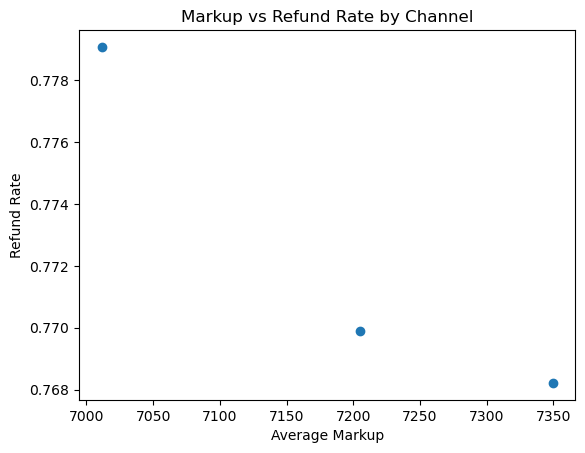

In [22]:
plt.figure()
plt.scatter(channel_profit['avg_markup'], channel_profit['refund_rate'])
plt.xlabel('Average Markup')
plt.ylabel('Refund Rate')
plt.title('Markup vs Refund Rate by Channel')
plt.show()


In [23]:
refund_summary = df.groupby('refund_status').agg(
    total_bookings=('refund_status', 'count'),
    avg_booking_value=('booking_value', 'mean'),
    avg_refund_amount=('refund_amount', 'mean')
).reset_index()

refund_summary


,refund_status,total_bookings,avg_booking_value,avg_refund_amount
0,No,6818,24938.479886,0.000000
1,Yes,23182,25122.302121,624.848335


In [24]:
refund_summary = df.groupby('refund_status').agg(
    total_bookings=('refund_status', 'count'),
    avg_booking_value=('booking_value', 'mean'),
    avg_refund_amount=('refund_amount', 'mean')
).reset_index()

refund_summary


,refund_status,total_bookings,avg_booking_value,avg_refund_amount
0,No,6818,24938.479886,0.000000
1,Yes,23182,25122.302121,624.848335


In [25]:
df['net_revenue'] = df['selling_price'] - df['costprice'] - df['refund_amount']
